# Análise de Dados TikTok via BigQuery

Este notebook faz uma análise exploratória dos dados extraídos da API do TikTok e armazenados no Google BigQuery.

In [7]:
print("Iniciando notebook TikTok ETL...")

# Bibliotecas
try:
    from google.cloud import bigquery
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import os
    print("Bibliotecas importadas com sucesso.")
except Exception as e:
    print("Erro ao importar bibliotecas:", e)

# Caminho da chave de serviço
try:
    os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "../gcp_key.json"
    print("Variável de autenticação configurada.")
except Exception as e:
    print("Erro ao configurar autenticação:", e)

Iniciando notebook TikTok ETL...
Bibliotecas importadas com sucesso.
Variável de autenticação configurada.


In [2]:
PROJECT_ID = "tiktok-data-pipeline"
DATASET = "tiktok_data"
TABLE = "videos"
client = bigquery.Client(project=PROJECT_ID)


In [8]:
query = f"""
SELECT
  hashtagName,
  uniqueId,
  nickname,
  playCount,
  diggCount,
  shareCount,
  commentCount,
  verified
FROM `{PROJECT_ID}.{DATASET}.{TABLE}`
WHERE playCount IS NOT NULL
"""

df = client.query(query).to_dataframe()
df.head()


/Users/giossaurus/Library/Python/3.12/lib/python/site-packages/google/cloud/bigquery/table.py:1933: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,hashtagName,uniqueId,nickname,playCount,diggCount,shareCount,commentCount,verified
0,johnnydeppvsamberheard,jdiawb,JDIAWB,10200,242,13,0,False
1,montero,besugo_,besugo_,1656,137,2,2,False
2,johnnydepp,thedebatechamber,TheDebateChamber,3316,102,0,42,False
3,4,brookeqturnerofficial,Brooke Q Turner,4349,46,0,0,False
4,distrotv,distro.tv,DistroTV,2841,53,0,0,False


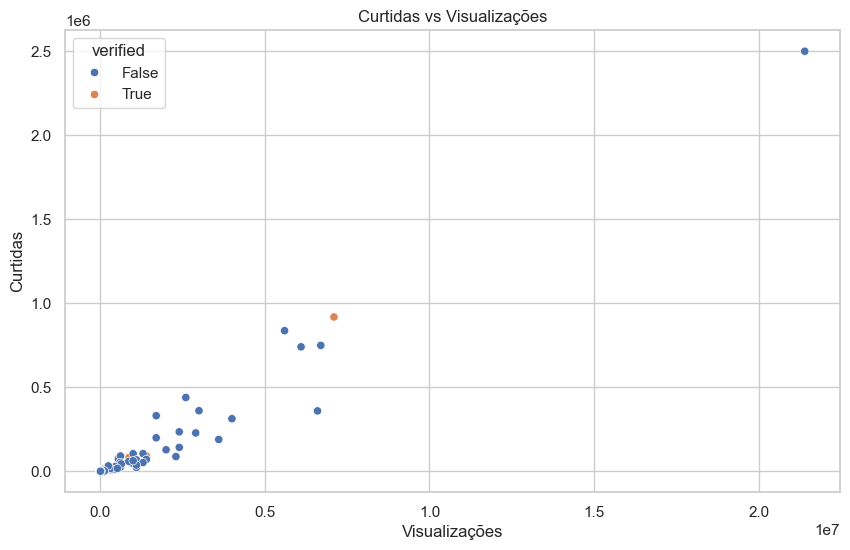

In [4]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="playCount", y="diggCount", hue="verified")
plt.title("Curtidas vs Visualizações")
plt.xlabel("Visualizações")
plt.ylabel("Curtidas")
plt.show()


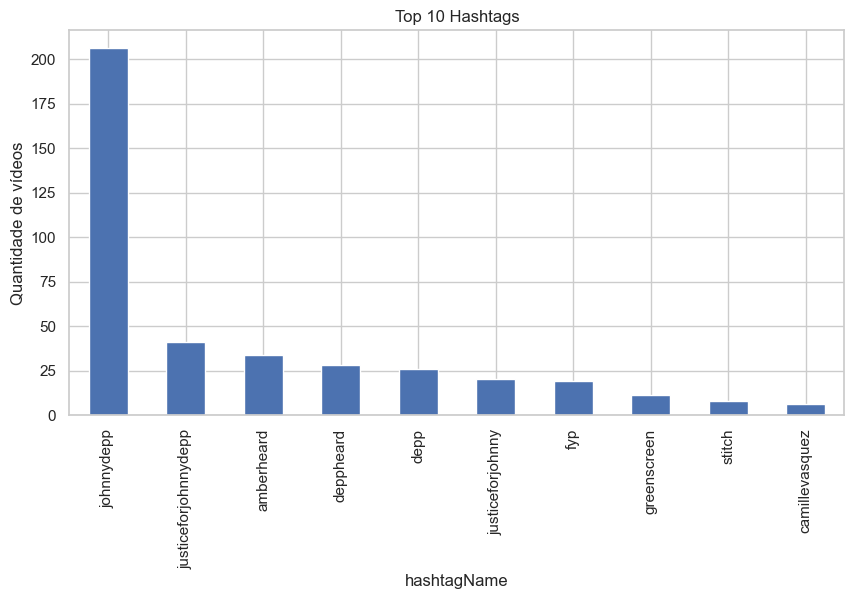

In [5]:
top_hashtags = df["hashtagName"].value_counts().head(10)
top_hashtags.plot(kind="bar", title="Top 10 Hashtags", figsize=(10,5))
plt.ylabel("Quantidade de vídeos")
plt.show()


In [6]:
df["engajamento"] = (df["diggCount"] + df["commentCount"] + df["shareCount"]) / df["playCount"]
df.sort_values("engajamento", ascending=False).head(10)


,hashtagName,uniqueId,nickname,playCount,diggCount,shareCount,commentCount,verified,engajamento
134,johnnydepp,demon_dean_girl,Damon’s baby,1410,424,8,55,False,0.34539
286,johnnydeppedit,jdepp5,ᵈᵉᵉᵖ ^^,1390,445,3,11,False,0.330216
413,johnnydepp,captainjohnnyvdepp,𝐿𝑒𝑜𝑛𝑖𝑒🦢,3933,1100,37,100,False,0.314518
289,mortrainey,jdepp5,ᵈᵉᵉᵖ ^^,151,46,0,1,False,0.311258
162,fyp,ph0xnix_,Phoenix (⌐■-■),475,137,0,2,False,0.292632
285,parati,jdepp5,ᵈᵉᵉᵖ ^^,1959,489,8,7,False,0.257274
180,deppheardtrial,shiroi.love,ShiroiLove...,34200,8463,37,68,False,0.250526
288,johnnydepp,jdepp5,ᵈᵉᵉᵖ ^^,704,171,1,0,False,0.244318
112,johnnydepp,michellegoldsteindean7,Michelle Golden Depp,1815,429,4,9,False,0.243526
284,johnnydepp,jdepp5,ᵈᵉᵉᵖ ^^,4093,944,17,32,False,0.242609
